# Polynominální regrese

## Úkol

- Načtěte dataset s velikostmi a cenami
- Prozkoumejte a zobrazte data
- Vytvořte lineární model a zjistětě jaho R2
- Vytvořte polynomiální modely s různým stupni, zjistěte jejich R2
- Vyberte nejlepší model 

# Načtení dat

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [23]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')

In [24]:
data.head()

,Size,Price
0,51.00000,901.18810
1,70.36735,972.23867
2,89.73469,1001.99394
3,109.10204,1024.90830
4,128.46939,1053.72491


# Lineární model
- standardizujte data
- vytvořte a natrénujte lineární model
- zobrazte parametry modelu
- vizualizujte lineární model
- zobrazte skóre modelu

In [25]:
# Z-standardization
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [26]:
# Vytvoření nového datasetu se standardizovanými proměnnými
data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

In [27]:
# Popis nových proměnných
data_std.describe()

,Size,Price
count,6.200000e+01,6.200000e+01
mean,3.187414e-16,-2.467560e-15
std,1.000000e+00,1.000000e+00
min,-1.690536e+00,-2.877085e+00
25%,-8.452679e-01,-5.836494e-01
50%,1.186304e-08,2.048456e-01
75%,8.452678e-01,8.083945e-01
max,1.690536e+00,1.348537e+00


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [29]:
# Rozdělení dat na tréninková a testovací
X = np.array(data_std['Size'])
Y = np.array(data_std['Price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

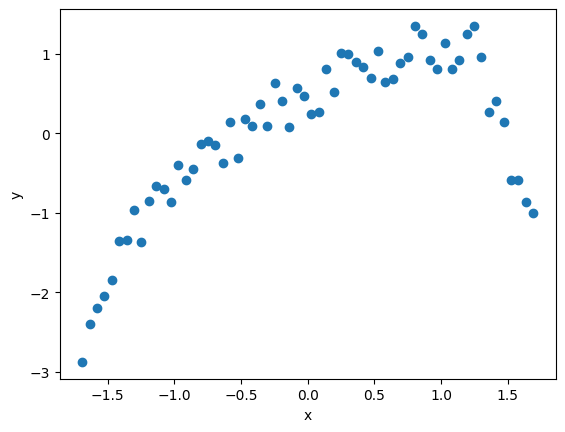

In [30]:
plt.scatter(X, Y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [31]:
# Modul lineární regrese potřebuje X ve formě matice, proto provedeme reshape
X_train = X_train.reshape(X_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)

In [32]:
# vytvoreni linearniho modelu
lin_model = LinearRegression()
# fit tréninkových dat na model
lin_model.fit(X_train, Y_train)

LinearRegression()

In [33]:
# vypsání parametrů modelu
print ("Bias: ", lin_model.intercept_)
print("Váhy: ", lin_model.coef_)

Bias:  -0.023898716058538244
Váhy:  [0.65554069]


In [34]:
def print_model_score(Y_train, y_train_predict, label):
    r2 = r2_score(Y_train, y_train_predict)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))    
    print(f"{label} R2 score: {r2}")
    print(f"{label} RMSE: {rmse}")

In [35]:
Y_predicted = lin_model.predict(X_train)
Y_test_predicted = lin_model.predict(X_test)
print_model_score(Y_train, Y_predicted, "Train")

Train R2 score: 0.42438438510602583
Train RMSE: 0.7602560932118535


In [36]:
def visualize_model_2d (X, Y, Y_predicted, title="Linear model", x_label="x", y_label="y"):  
    # spojeni X_train, Y_train a Y_predicted do jednoho numpy pole, aby šly setřídit
    prediction = np.zeros((X.shape[0], 3))
    prediction[:,0]=X[:,0]
    prediction[:,1]=Y
    prediction[:,2]=Y_predicted
    prediction=prediction[prediction[:, 0].argsort()]    
            
    fig1 = plt.figure() 
    plt.plot (prediction[:,0], prediction[:,2], c='b', label = "Train prediction")
    plt.scatter (prediction[:,0], prediction[:,1], marker = 'x', c='r', label="Train actual")
    plt.title (title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

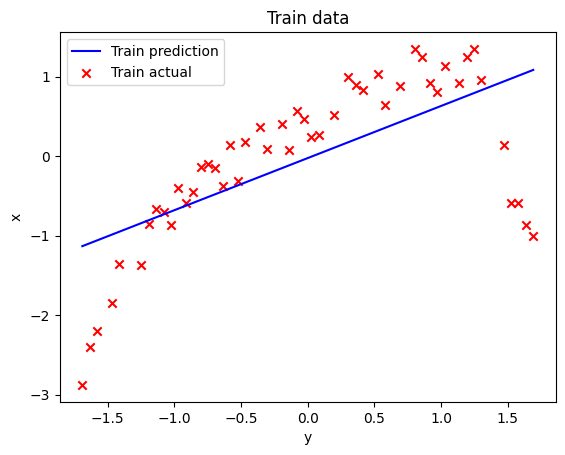

In [37]:

visualize_model_2d(X_train, Y_train, Y_predicted, "Train data")

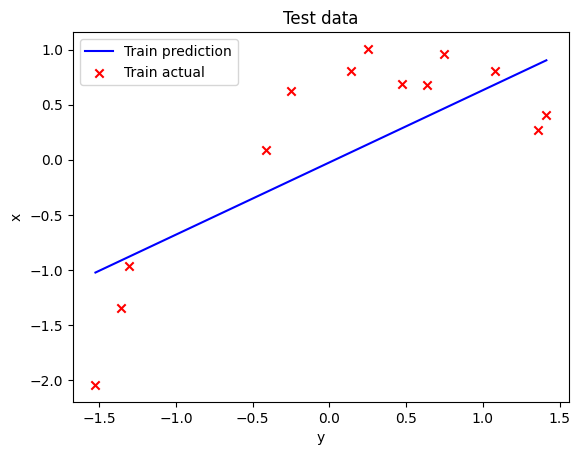

Test R2 score: 0.6104184448071497
Test RMSE: 0.5848281944043509


In [38]:
visualize_model_2d(X_test, Y_test, Y_test_predicted, "Test data")
print_model_score(Y_test, Y_test_predicted, "Test")

# Vytvořte polynominální regresní model
- vytvořte model polynominální 1D model se stupni 2 - 8
- modely zobrazte
- zobrazte jejich parametry
- zobrazte jejich skóre
- Který model byste vybrali?

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [40]:
# Pro nalezení polynomu, kterým lze proložit data použijeme knihovnu numpy. 
# Případně lze použít i knihovna scikit-learn - from sklearn.preprocessing import PolynomialFeatures
def polynomial_fit(X, Y, degree = 1):
    return np.poly1d(np.polyfit(X, Y, degree))

In [41]:
def visualize_model (p, X_train, Y_train, X_test, Y_test, degree, x_label = "Size", y_label = "Price"):              
    fig1 = plt.figure()    
    plt.scatter (X_train, Y_train, c='r', label="Train ")
    plt.scatter (X_test, Y_test, c='b', label="Test ")
    
    curve_x = np.arange(min(X_train), max(max(X_train), max(X_test)), 0.01)    
    plt.plot(curve_x, p(curve_x), label=f"Polynomial of degree {degree}")  
            
    plt.title ("Model")
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

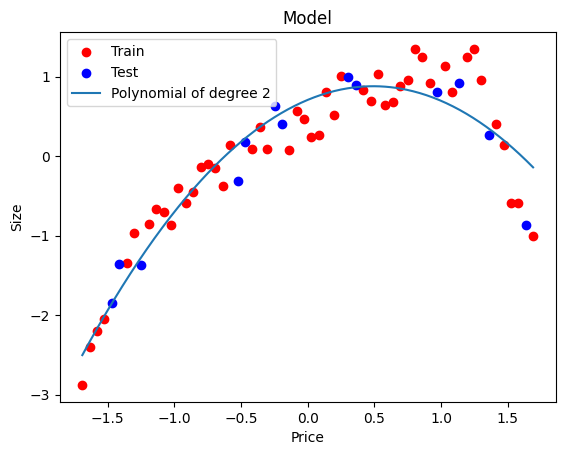

Váhy:  [-0.7104355   0.6978501   0.70802052]
Train R2 score: 0.06422087540089272
Train RMSE: 0.967823852977963
Test R2 score: 0.7225229629803158
Test RMSE: 0.5042080414151282


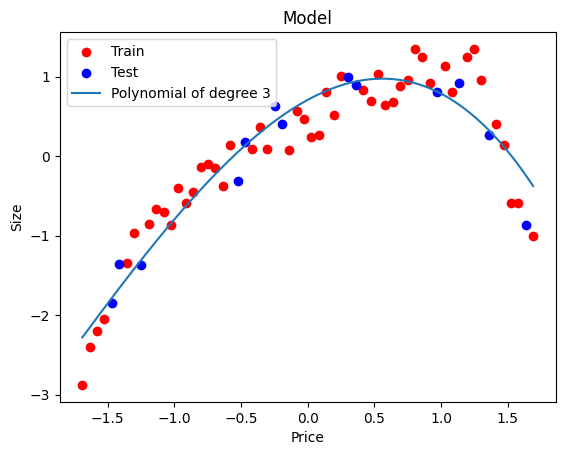

Váhy:  [-0.12265283 -0.71297955  0.91285303  0.70853311]
Train R2 score: 0.5592551510029302
Train RMSE: 0.6642067240927149
Test R2 score: 0.7831306951656323
Test RMSE: 0.44575403927756224


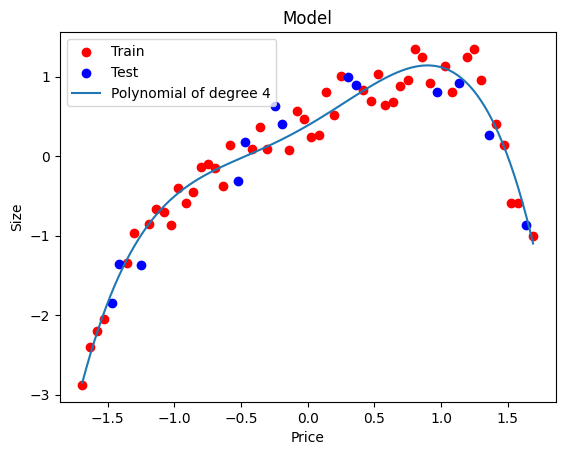

Váhy:  [-0.40225687 -0.1596337   0.32267181  0.97122942  0.38622706]
Train R2 score: -10.36465083952902
Train RMSE: 3.3727775140150555
Test R2 score: 0.5022753060837506
Test RMSE: 0.6752908072804786


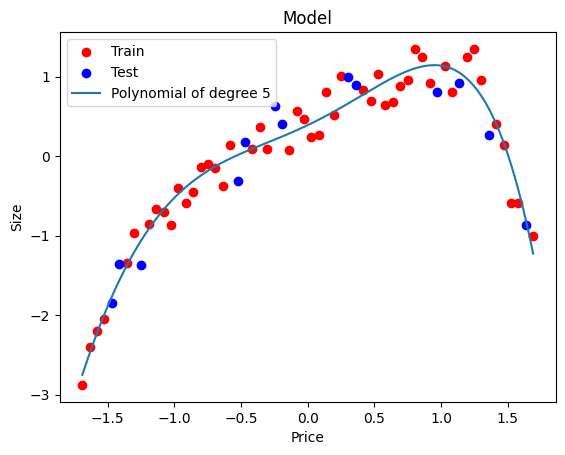

Váhy:  [-0.08166841 -0.40428969  0.10967298  0.32164136  0.80238202  0.39036942]
Train R2 score: -2.610579714148989
Train RMSE: 1.9010700244006038
Test R2 score: 0.6237722088633453
Test RMSE: 0.5871129773989852


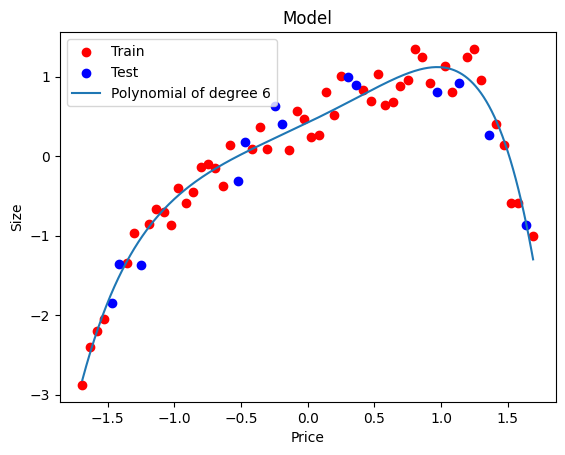

Váhy:  [-0.05815361 -0.0789512  -0.17237894  0.09888699  0.09837078  0.80813116
  0.42224153]
Train R2 score: -20.59127149036378
Train RMSE: 4.648884477558307
Test R2 score: 0.5140544769411126
Test RMSE: 0.6672522337118472


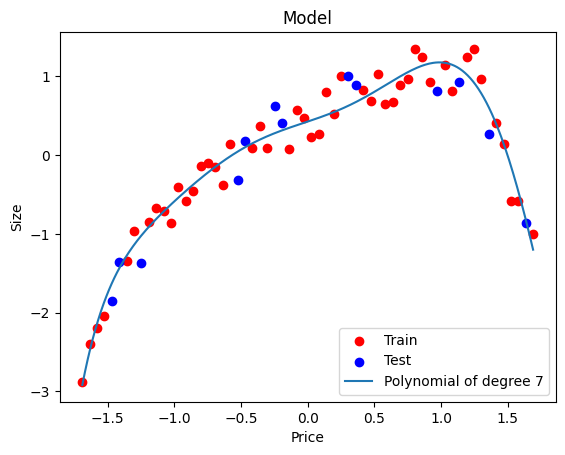

Váhy:  [ 0.10931971 -0.06294145 -0.60233816 -0.15555535  0.80691999  0.08768927
  0.56745446  0.42649999]
Train R2 score: -328.003275532263
Train RMSE: 18.14720545099782
Test R2 score: 0.16262440340641637
Test RMSE: 0.8759037662186709


In [42]:
for degree in range (2, 8):
    p = polynomial_fit(X_train, Y_train, degree)  
    visualize_model (p, X_train, Y_train, X_test, Y_test, degree)    
    print("Váhy: ", p.coef)
    print_model_score(Y_train, p(Y_train), "Train")
    print_model_score(Y_test, p(Y_test), "Test")

Vybral bych model se stupněm číslo 3